# (F3022 Métodos Computacionais em Engenharia)
## Exame da época normal 
### 14 de Junho de 2024 (3h de duração)

A cotação de cada alínea aparece no início do respectivo enunciado, na escala de 100%.

In [44]:
# Importar as bibliotecas que vamos usar
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

from typing import Callable

### Descrição do problema

Pretendemos estudar o comportamento de um feixe de electrões a interagir com um potencial especial:

$$ V(x) = -\frac{\hbar^2}{2m}\frac{\alpha^2 s(s+1)}{\cosh^2(\alpha x),}
	$$ 

que é caracterizado pelos parâmetros $1/\alpha$ (largura) e $s$ (profundidade). É conhecido por potencial de Pöschl–Teller, ou de sech quadrada.

A solução analítica da equação de Schrödinger em 1D com este potencial, permite calcular o coeficiente de transmissão como sendo:
$$ T = \frac{p^2}{1+p^2},
$$
onde
$$ p = \frac{\sinh(\pi k /\alpha)}{\sin(\pi s)}
$$
e $k=\sqrt{2mE}/\hbar$ (se $E>0$).

Torna-se claro destes resultados que o potencial não reflecte qualquer onda nos casos especiais de $s$ ser um inteiro, pois $T=1$ para qualquer valor de $k$.

Considere a equação de Schrödinger dependente do tempo:
$$ i\hbar \frac{\partial \psi(x,t)}{\partial t} = \hat{H}\psi(x,t) = -\frac{\hbar^2}{2m_e} \frac{\partial^2 \psi(x,t)}{\partial x^2} + V(x)\psi(x,t).
$$

É conveniente re-escalar a equação para as chamadas unidades atómicas, em que tomamos como escala de comprimento o raio de Bohr $a_B=5,29\times 10^{-11}(m)$, a massa escalada à massa do electrão, $m_e= 9.11\times 10^{-31}(kg)$, e o tempo a $\bar{t}= \frac{\hbar}{m_e a_B^2}= 2.22\times 10^{-17}(s)$.

Daqui resulta que as unidades de energia são $E_B = \frac{\hbar^2}{m_e a_B^2}=4.36\times 10^{-18}(J)$

Queremos simular o feixe de electrões (monocromático) como um pacote de ondas gaussiano a deslocar-se com um dado momento:
$\psi(x,t=0) = \exp(-ik_0 x ) \exp(-( x-x_0)^2 /(2\sigma^2))$
(unidades escaladas)

Dados: 

#### Perguntas

a) [15] Escale a equação de Schrödinger a unidades atómicas, usando as definições acima. Obterá assim uma equação de Schrödinger só com  grandezas adimensionais, de ordem unitária.(se preferir, pode fazer em papel e enviar o pdf)

Ver imagem `A-Resolução`.

Considere um domínio $x\in [-L, L ]$, com $L$ suficientemente grande para não ter problemas com as fronteiras (sugiro $L=50-100\, $, dependendo do tempo que demorar a correr cada simulação no seu PC).

b) [10] Queremos escrever um programa que lhe permita propagar no tempo um pacote de onda gaussiano incidente. Escolha para isso um método numérico(desde que **apropriado!**). Comente méritos e deméritos relativamente a outras hipóteses.(Nota: escolher aqui um método inapropriado terá consequências nos resultados, e também na correção, nas alíneas seguintes!)

Vamos optar pelo método de Crank-Nicholson, pois:
- É mais complexo que os métodos FTCS e BTCS mas preserva a unicidade do operador evolução temporal, o que é necessário para obtermos resultados físicos. De facto:
    - Métodos FTCS e BTCS aproximam o operador evolução temporal de forma não unitária:
    $$
        \begin{align*}
        e^{-i\hat H t} &\approx \textbf 1 \pm i\hat H t
        \\\\
        (\textbf 1 \pm i\hat H t)(\textbf 1 \pm i\hat H t)^\dag &= (\textbf 1 \pm i\hat H t)(\textbf 1 \mp i\hat H t)
        \\\\
        &= \textbf 1 +\hat H^2t^2
        \\\\
        &\ne \textbf 1
        \end{align*}
    $$
    - Método de CN aproxima o operador evolução temporal de forma unitária:
    $$
        \begin{align*}
        e^{-i\hat H t} &\approx \frac{\textbf 1 - \frac 12i\hat H t}{\textbf 1 + \frac 12i\hat H t}
        \\\\
        \left(\frac{\textbf 1 - \frac 12i\hat H t}{\textbf 1 + \frac 12i\hat H t}\right)\left(\frac{\textbf 1 - \frac 12i\hat H t}{\textbf 1 + \frac 12i\hat H t}\right)^\dag &= \left(\frac{\textbf 1 - \frac 12i\hat H t}{\textbf 1 + \frac 12i\hat H t}\right)\left(\frac{\textbf 1 + \frac 12i\hat H t}{\textbf 1 - \frac 12i\hat H t}\right)
        \\\\
        &= \frac{\textbf 1 + \frac 14\hat H^2 t^2}{\textbf 1 + \frac 14\hat H^2 t^2}
        \\\\
        &= \textbf 1
        \end{align*}
    $$

- O método de CN é mais simples de implementar do que os métodos espetrais disponíveis, pelo que é uma boa escolha quando estamos com tempo limitado. Contudo, pode levar a dispersão não física do resultado, uma vez que não temos a vantagem de ter um método numérico exato no espaço de Fourier.


O método de Crank-Nicholson é dado por:
$$

\begin{align*}
&\ \frac{1}{2}\frac{\Delta t}{(\Delta x)^2}\psi_{j+1}^{n+1} +\left(i-\frac{\Delta t}{(\Delta x)^2}-\frac{1}{2}\Delta t V_j\right)\psi_j^{n+1}+\frac{1}{2}\frac{\Delta t}{(\Delta x)^2}\psi_{j-1}^{n+1}=
\\\\
&\ -\frac{1}{2}\frac{\Delta t}{(\Delta x)^2}\psi_{j-1}^n + \left(i+\frac{\Delta t}{(\Delta x)^2}+\frac{1}{2}\Delta t V_j\right)\psi_j^{n} -\frac{1}{2}\frac{\Delta t}{(\Delta x)^2}\psi_{j+1}^n\tag{2}
\end{align*}
$$

c) [10] Usando o método de von Neumann, determine a estabilidade do esquema numérico que escolheu.

Ver imagem `C1-Resolução` seguida de `C2-Resolução`

d) [35] Escreva um programa que lhe permita propagar no tempo um pacote de ondas gaussiano incidente da esquerda ($x<0$), com energia $E$ (ou use $k$) sobre um potencial situado na região perto de $x=0$, usando um método escolhido. Indique as condições fronteira a usar e comente o porquê da sua escolha. O programa deve permitir usar diferentes potenciais sem alterações na estrutura (ié, use funções!).

---

No nosso programa vamos usar condições Fronteira de Dirichlet, considerando que $\psi(x, t) = 0$ caso $x = 0$ ou $x = L$.

Esta escolha leva a resultados válidos se considerarmos um domínio suficientemente grande, pois como vamos simular um pacote de ondas gaussiano junto à origem do referencial, esperamos que $\psi(x, t) \to 0$ à medida que nos afastamos da origem!

Adimensionalizando o potencial em jogo, usando a definição feita no exercício 1: $V(x) = E_B V_a(x)$.


$$
\begin{align*}
V(x) = -\frac{\hbar^2}{2m}\frac{\alpha^2 s(s+1)}{\cosh^2(\alpha x)} &\Leftrightarrow E_B V_a(x) = -\frac{\hbar^2}{2m}\frac{\alpha^2 s(s+1)}{\cosh^2(\alpha x)}
\\\\
&\Leftrightarrow V_a(x) = -\frac{\alpha_B^2}{2}\frac{\alpha^2 s(s+1)}{\cosh^2(\alpha x)}
\end{align*}
$$ 

Podemos agora definir $A = \alpha_B^2\alpha^2$ e escrever:
$$
\begin{align*}
V_a(x) = -\frac{A^2}{2}\frac{s(s+1)}{\cosh^2(\alpha x)}
\end{align*}
$$ 

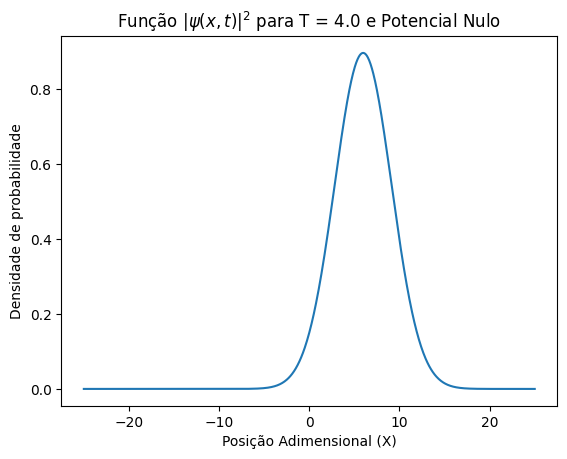

MovieWriter ffmpeg unavailable; using Pillow instead.


In [45]:
def schrodinger1DCN(T: float, ci: np.ndarray, vv: np.ndarray, mask: np.ndarray, dx: float, dt: float, save: bool = False) -> tuple[np.ndarray, float]:
    """
        Resolve a equação de Schrödinger de forma aproximada usando o método de Crank-Nicholson, assumindo que os pontos na fronteira do domínio têm valor fixo!

        :param T: float, Tempo para evoluir a equação
        :param ci: np.ndarray, array com as condições iniciais
        :param vv: np.ndarray, array com o potencial avaliado nos pontos do domínio
        :param mask: np.ndarray, evolui apenas os pontos onde `mask == True`
        :param dx: float, espaçamento entre pontos no eixo dos xx
        :param dt: float, intervalo de tempo usado

        :return: tuple containing:
            - np.ndarray, vetor solução
            - float, tempo decorrido
    """

    # Copiar condições iniciais
    Nx = ci.shape[0]
    now = np.array(np.copy(ci), dtype=np.complex128)
    nex = np.array(np.copy(ci), dtype=np.complex128)

    vv = np.array(np.copy(vv), dtype=np.complex128)

    total = []
    if save:
        total = [list(np.copy(now))]
    
    # Número máximo de iterações
    iMax = T // dt + 1

    # Números auxiliares
    alpha = dt / (2 * dx**2)
    A0 = 1j - 2 * alpha - (dt / 2) * vv
    B0 = 1j + 2 * alpha + (dt / 2) * vv

    # Construir a matriz de coeficientes A
    aa = sp.sparse.diags_array([A0, alpha, alpha], offsets=[0, -1, 1], shape=(Nx, Nx))

    # Aplicar máscara
    aa = sp.sparse.lil_matrix(aa)
    for i, item in enumerate(mask):
        if not item:
            aa[i, (i-1) % Nx] = 0
            aa[i, i] = 1
            aa[i, (i+1) % Nx] = 0
    
    
    # Pré-fatorizar a matriz de coeficientes
    aa = sp.sparse.csc_matrix(aa)
    aaSolver = sp.sparse.linalg.factorized(aa)

    # Construir a matriz que permite obter o vetor do lado direito B
    bb = sp.sparse.diags_array([B0, -alpha, -alpha], offsets=[0, -1, 1], shape=(Nx, Nx))

    # Aplicar máscara
    bb = sp.sparse.lil_matrix(bb)
    for i, item in enumerate(mask):
        if not item:
            bb[i, (i-1) % Nx] = 0
            bb[i, i] = 1
            bb[i, (i+1) % Nx] = 0
    
    # Evoluir no tempo
    i = 0
    while i < iMax:
        nex = aaSolver(bb @ now)
            
        i += 1
        now = np.copy(nex)
        
        if save:
            total += [list(np.copy(now))]
    
    # Devolver todos os estados
    if save:
        return np.array(total), i * dt

    return now, i * dt


# Testar a função


# Parâmetros
Lx = 50
Nx = 1001
dx = Lx / (Nx-1)

Tmax = 4
Nt = 1001
dt = Tmax / (Nt-1)


xx = np.linspace(-Lx/2, Lx/2, Nx)
mask = np.full_like(xx, True)
mask[0] = False
mask[-1] = False


# Funções Auxiliares
k0 = 2
x0 = -10
sigma = 4
def gaussbeam(x: np.ndarray) -> np.ndarray:
    return np.exp(1j * k0 * x) * np.exp(-(x-x0)**2/(2 * sigma**2))


def potencialTeste(x: np.ndarray) -> np.ndarray:
    return np.zeros_like(x)


# Construir parâmetros
ci = gaussbeam(xx)
vv = potencialTeste(xx)

# Chamar a função
sol, tempo = schrodinger1DCN(Tmax, ci, vv, mask, dx, dt, save=True)


# Mostrar
plt.title(f"Função $|\\psi(x, t)|^2$ para T = {tempo} e Potencial Nulo")
plt.plot(xx, np.abs(sol[-1])**2, label="Resultado")
plt.xlabel("Posição Adimensional (X)")
plt.ylabel("Densidade de probabilidade")
plt.show()

# Fazer o Vídeo!
fig, ax = plt.subplots()
line, = ax.plot(xx, np.abs(sol[0])**2)
ax.set_ylim(-0.04, 1)


# Velocidade
videoS = Tmax * 5

# Função de inicialização
def init():
    plt.title(f"Propagação por $T = 0$ (unidade de tempo)")
    plt.xlabel("Posição Adimensional (X)")
    plt.ylabel("Densidade de probabilidade")
    line.set_ydata(np.abs(sol[0])**2)
    return line,

# Função de atualização
def update(frame):
    index =  frame * videoS

    plt.title(f"Propagação por $T = {dt * index:.2f}$ (unidade de tempo)")
    line.set_ydata(np.abs(sol[index])**2)
    return line,

# Criar a animação
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(sol) // videoS), init_func=init, blit=True, interval=50)
ani.save('animation1.gif', writer='ffmpeg', fps=20)
plt.close()

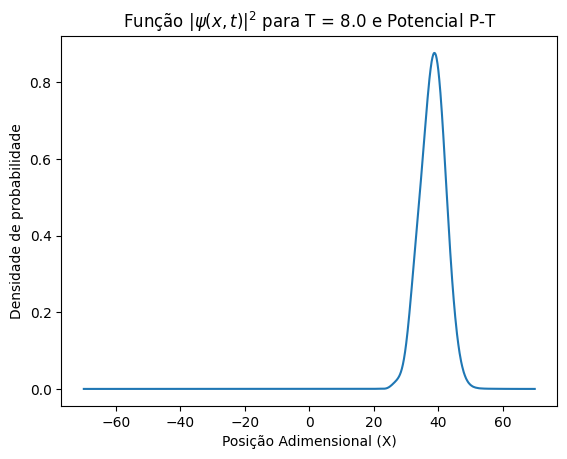

MovieWriter ffmpeg unavailable; using Pillow instead.


In [46]:
# Parâmetros
Lx = 140
Nx = 8001
dx = Lx / (Nx-1)

Tmax = 8
Nt = 4001
dt = Tmax / (Nt-1)


xx = np.linspace(-Lx/2, Lx/2, Nx)
mask = np.full_like(xx, True)
mask[0] = False
mask[-1] = False

# Feixe gaussiano
k0 = 3
x0 = -10
sigma = 5
def gaussbeam(x: np.ndarray) -> np.ndarray:
    return np.exp(1j * k0 * x) * np.exp(-(x-x0)**2/(2 * sigma**2))

# Potencial em jogo
raioBohr = 1   # Permite ver melhor os efeitos do potencial
a = 1
s = 2.5
def potencialPT(x: np.ndarray) -> np.ndarray:
    return -(raioBohr**2 / 2) * (a**2 * s * (s+1)) / ((np.cosh(a * x))**2)


# Construir parâmetros
ci = gaussbeam(xx)
vv = potencialPT(xx)

# Chamar a função
sol, tempo = schrodinger1DCN(Tmax, ci, vv, mask, dx, dt, save=True)


# Mostrar
plt.title(f"Função $|\\psi(x, t)|^2$ para T = {tempo} e Potencial P-T")
plt.plot(xx, np.abs(sol[-1])**2, label="Resultado")
plt.xlabel("Posição Adimensional (X)")
plt.ylabel("Densidade de probabilidade")
plt.show()

# Fazer o Vídeo!
fig, ax = plt.subplots()
line, = ax.plot(xx, np.abs(sol[0])**2)
ax.set_ylim(-0.04, 1)


# Velocidade
videoS = Nt // 100

# Função de inicialização
def init():
    plt.title(f"Propagação por $T = 0$ (unidade de tempo)")
    plt.xlabel("Posição Adimensional (X)")
    plt.ylabel("Densidade de probabilidade")
    line.set_ydata(np.abs(sol[0])**2)
    return line,

# Função de atualização
def update(frame):
    index =  frame * videoS

    plt.title(f"Propagação por $T = {dt * index:.2f}$ (unidade de tempo)")
    line.set_ydata(np.abs(sol[index])**2)
    return line,

# Criar a animação
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(sol) // videoS), init_func=init, blit=True, interval=50)
ani.save('animation2.gif', writer='ffmpeg', fps=20)
plt.close()

e) [15] Estude a transmissão e reflexão de um pacote gaussiano no potencial de Pöschl–Teller, nos seguintes casos:
 *  $s$ semi-inteiro (p.ex. $s=3.5$);
 *  $s$ inteiro (p.ex. $s=2$).
	
 Em cada caso estude a razão entre probabilidade do pacote transmitido $ \int_{-\infty}^{\infty}|\psi_T(x)|^2\ dx$ e do pacote incidente, para vários valores da energia, apresentando-o na forma de um gráfico.

_Nota_: o integral de cada um dos pacotes não pode realmente ser até ao "infinito" (leia-se, limites da janela de computação), de cada lado do potencial, caso contrário não os distingue.

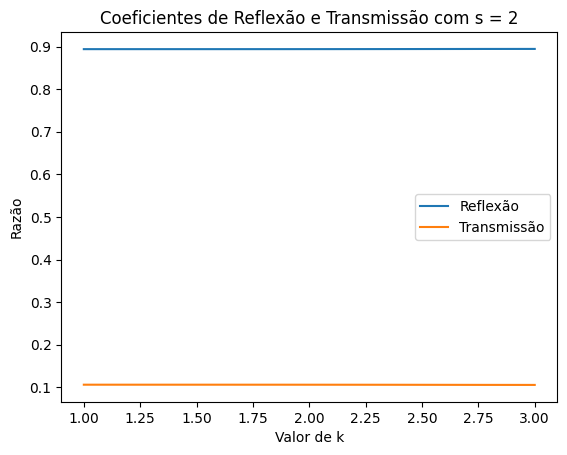

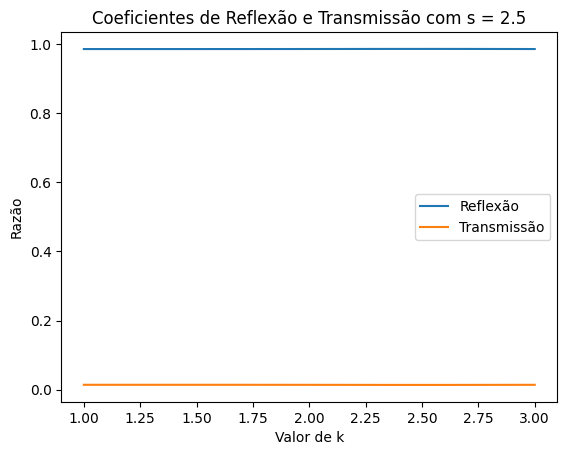

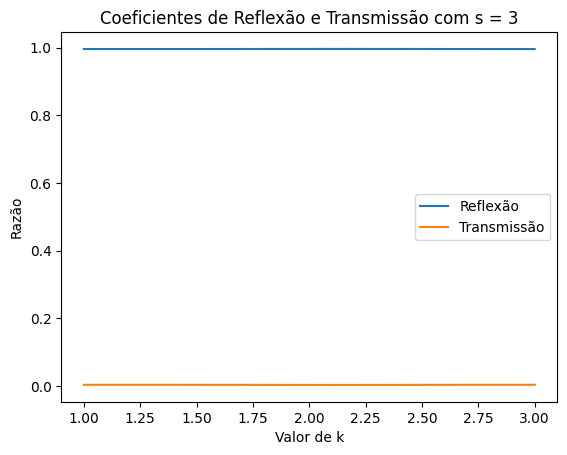

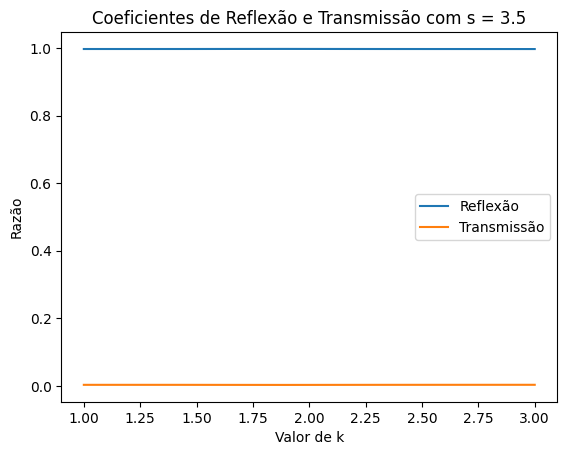

In [48]:
# Parâmetros
Lx = 140
Nx = 4001
dx = Lx / (Nx-1)

Nt = 2001


xx = np.linspace(-Lx/2, Lx/2, Nx)
mask = np.full_like(xx, True)
mask[0] = False
mask[-1] = False

# Feixe gaussiano
x0 = -10
sigma = 5

# Potencial em jogo
raioBohr = 1   # Permite ver melhor os efeitos do potencial
a = 2.3


def estudarPT(s: float, kk: np.ndarray, tt: np.ndarray) ->tuple[np.ndarray, np.ndarray]:
    """
        Determinar a razão entre a densidade de probabilidade no pacote refletido e no pacote incidente, para vários valores da energia.
    """

    def potencialPT(x: np.ndarray) -> np.ndarray:
        return (raioBohr**2 / 2) * (a**2 * s * (s+1)) / ((np.cosh(a * x))**2)

    vv = potencialPT(xx)

    densidadeR = []
    densidadeT = []
    densidadeI = []
    for k, Tmax in zip(kk, tt):
        # Passo no tempo
        dt = Tmax / (Nt-1)

        # Feixe gaussiano
        def gaussbeam(x: np.ndarray) -> np.ndarray:
            return np.exp(1j * k0 * x) * np.exp(-(x-x0)**2/(2 * sigma**2))
        

        # Construir condição inicial
        ci = gaussbeam(xx)
        ciTemp = np.abs(ci)**2
        ii = ciTemp[:-2:2] + 4 * ciTemp[1:-1:2] + ciTemp[2: :2]
        densidadeI += [dx * (ii.sum()) / 3]

        # Chamar a função
        sol, tempo = schrodinger1DCN(Tmax, ci, vv, mask, dx, dt)

        # Obter a densidade de probabilidade corresponde à reflexão e transmissão
        ref, tra = np.abs(sol[:sol.shape[0]//2])**2, np.abs(sol[sol.shape[0]//2:])**2

        # Calcular as densidades de probabilidade totais (integral com a regra de Simpson)
        rr = ref[:-2:2] + 4 * ref[1:-1:2] + ref[2: :2]
        densidadeR += [dx * (rr.sum()) / 3]

        tt = tra[:-2:2] + 4 * tra[1:-1:2] + tra[2: :2]
        densidadeT += [dx * (tt.sum()) / 3]
    
    densidadeR = np.array(densidadeR)
    densidadeT = np.array(densidadeT)
    densidadeI = np.array(densidadeI)
    return densidadeR / densidadeI, densidadeT / densidadeI




for s in [2, 2.5, 3, 3.5]:
    kk = np.linspace(1, 3, 10)
    rr, tt = estudarPT(s, kk, 6 * kk)

    plt.title(f"Coeficientes de Reflexão e Transmissão com s = {s}")
    plt.plot(kk, rr, label="Reflexão")
    plt.plot(kk, tt, label="Transmissão")
    plt.xlabel("Valor de k")
    plt.ylabel("Razão")
    plt.legend()
    plt.show()

f) [7.5] Indique alterações que pode fazer para melhorar o resultado numérico, justificando. 

Para melhorar o resultado numérico podemos:
- Começar por refinar a grelha utilizada, diminuindo $\Delta x$ e/ $\Delta t$
- Fazer a média temporal no método de Crank-Nicholson recorrendo à média espacial de $\psi_i$ em dois pontos adjacentes


Podemos ainda notar que neste caso o método de CN parece não ser o mais apropriado para resolver a ESDT. Isto pode estar relacionado à análise feita na alínea c) onde concluimos que o método de CN apenas é estável se as componentes espetrais do potencial forem nulas, o que vemos acontecer ao testar o programa para um potencial nulo.

g) [7.5] Se pretendermos uma aproximação melhor, podemos usar a discretização do laplaciano com uma fórmula de 5 pontos em vez de 3. Uma possibilidade é:
$$\frac{\partial^2 \psi}{\partial x^2} \approx \frac{-\psi_{i-2} + 16\psi_{i-1} - 30\psi_{i} + 16\psi_{i+1} - \psi_{i+2} }{12h^2},$$

que dá uma precisão $\mathcal{O}(h^4)$.
Como se altera a matriz dos coeficientes? Escreva o comando para produzir os elementos apropriados usando o comando _spdiags_.

--- 


Ver `G1-Resolução` basta multiplicar por $\Delta t$, obtendo-se o código abaixo (a matriz pedida é a matriz `aa`)!

In [50]:
def schrodinger1DCNv2(T: float, ci: np.ndarray, vv: np.ndarray, mask: np.ndarray, dx: float, dt: float, save: bool = False) -> tuple[np.ndarray, float]:
    """
        Resolve a equação de Schrödinger de forma aproximada usando o método de Crank-Nicholson, assumindo que os pontos na fronteira do domínio têm valor fixo!

        :param T: float, Tempo para evoluir a equação
        :param ci: np.ndarray, array com as condições iniciais
        :param vv: np.ndarray, array com o potencial avaliado nos pontos do domínio
        :param mask: np.ndarray, evolui apenas os pontos onde `mask == True`
        :param dx: float, espaçamento entre pontos no eixo dos xx
        :param dt: float, intervalo de tempo usado

        :return: tuple containing:
            - np.ndarray, vetor solução
            - float, tempo decorrido
    """

    # Copiar condições iniciais
    Nx = ci.shape[0]
    now = np.array(np.copy(ci), dtype=np.complex128)
    nex = np.array(np.copy(ci), dtype=np.complex128)

    vv = np.array(np.copy(vv), dtype=np.complex128)

    total = []
    if save:
        total = [list(np.copy(now))]
    
    # Número máximo de iterações
    iMax = T // dt + 1

    # Números auxiliares
    alpha2 = dt / (24 * dx**2)
    alpha1 = (2 * dt) / (3 * dx**2)
    A0 = 1j - (5 * dt / (4 * dx**2)) - (dt / 2) * vv
    B0 = 1j + (5 * dt / (4 * dx**2)) - (dt / 2) * vv

    # Construir a matriz de coeficientes A  
    aa = sp.sparse.diags_array([A0, alpha1, alpha1, -alpha2, -alpha2], offsets=[0, -1, 1, -2, 2], shape=(Nx, Nx))

    # Aplicar máscara
    aa = sp.sparse.lil_matrix(aa)
    for i, item in enumerate(mask):
        if not item:
            aa[i, (i-1) % Nx] = 0
            aa[i, i] = 1
            aa[i, (i+1) % Nx] = 0
    
    # Tirar o comentário para ver a matriz pedida
    # print(aa)
    
    # Pré-fatorizar a matriz de coeficientes
    aa = sp.sparse.csc_matrix(aa)
    aaSolver = sp.sparse.linalg.factorized(aa)

    # Construir a matriz que permite obter o vetor do lado direito B
    bb = sp.sparse.diags_array([B0, -alpha1, -alpha1, alpha2, alpha2], offsets=[0, -1, 1, -2, 2], shape=(Nx, Nx))

    # Aplicar máscara
    bb = sp.sparse.lil_matrix(bb)
    for i, item in enumerate(mask):
        if not item:
            bb[i, (i-1) % Nx] = 0
            bb[i, i] = 1
            bb[i, (i+1) % Nx] = 0
    
    # Evoluir no tempo
    i = 0
    while i < iMax:
        nex = aaSolver(bb @ now)
            
        i += 1
        now = np.copy(nex)
        
        if save:
            total += [list(np.copy(now))]
    
    # Devolver todos os estados
    if save:
        return np.array(total), i * dt

    return now, i * dt